In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [71]:
cr = pd.read_csv("credit_risk_dataset.csv")
cr

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [72]:
cr.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [73]:
cr.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [74]:
cr.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [75]:
cr.shape

(32581, 12)

In [76]:
cr.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [77]:
cr["person_emp_length"].mean()

4.789686296787225

In [78]:
cr["person_emp_length"] = cr["person_emp_length"].fillna("4.789")

In [79]:
cr["loan_int_rate"].mean()

11.011694892245036

In [80]:
cr["loan_int_rate"] = cr["loan_int_rate"].fillna("11.011")

## Visualization.

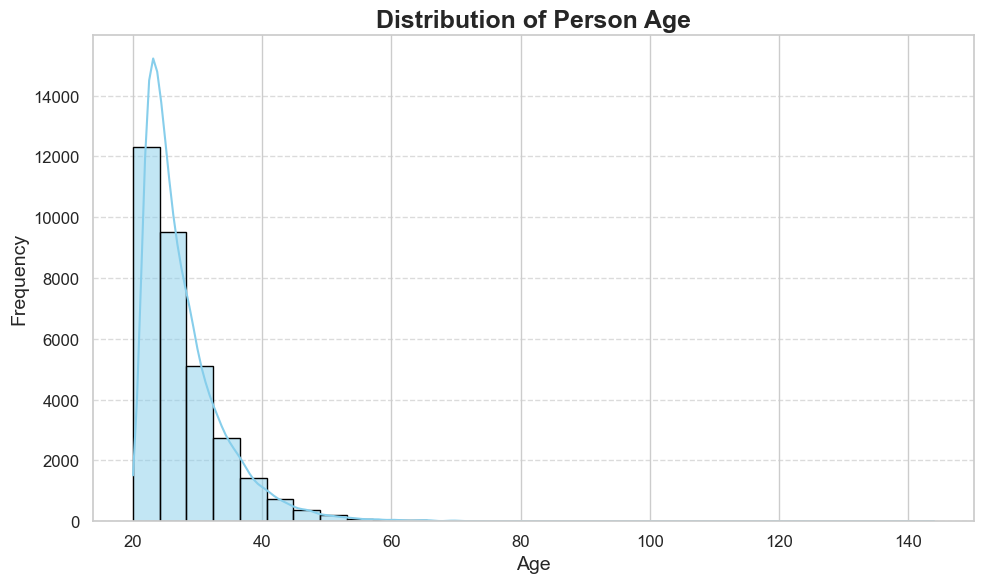

In [81]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the histogram
plt.figure(figsize=(10, 6))
hist_plot = sns.histplot(cr['person_age'], bins=30, kde=True, color='skyblue', edgecolor='black')

# Add title and labels with a larger font size
plt.title('Distribution of Person Age', fontsize=18, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Customize the x-ticks for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\miracle\AppData\Local\Temp\ipykernel_5856\443308849.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(x='loan_status', y='loan_amnt', data=cr, palette='pastel', linewidth=1.5)


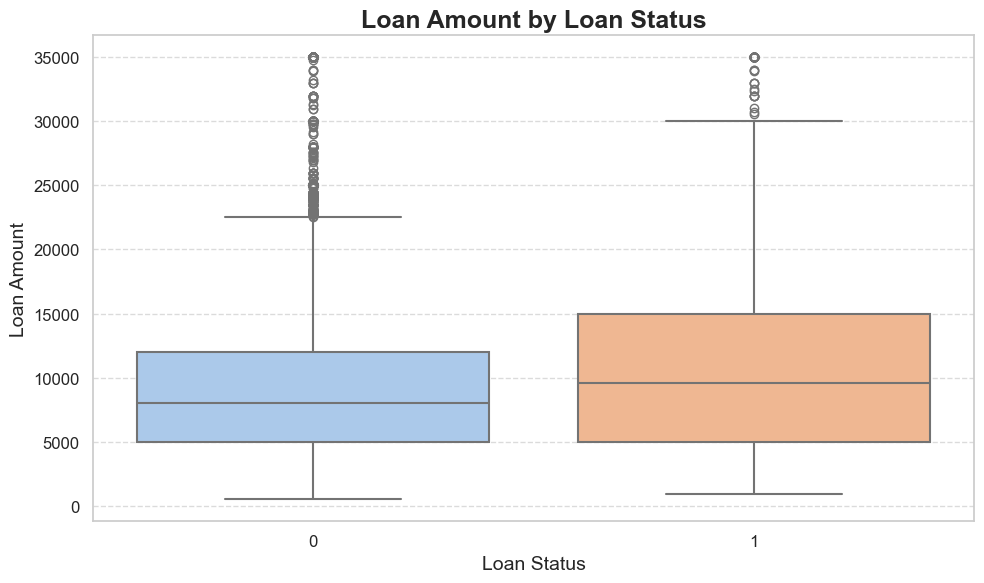

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the box plot
plt.figure(figsize=(10, 6))
box_plot = sns.boxplot(x='loan_status', y='loan_amnt', data=cr, palette='pastel', linewidth=1.5)

# Add title and labels with a larger font size
plt.title('Loan Amount by Loan Status', fontsize=18, fontweight='bold')
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Loan Amount', fontsize=14)

# Customize x-ticks for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\miracle\AppData\Local\Temp\ipykernel_5856\2930571159.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(x='person_home_ownership', data=cr, palette='pastel')


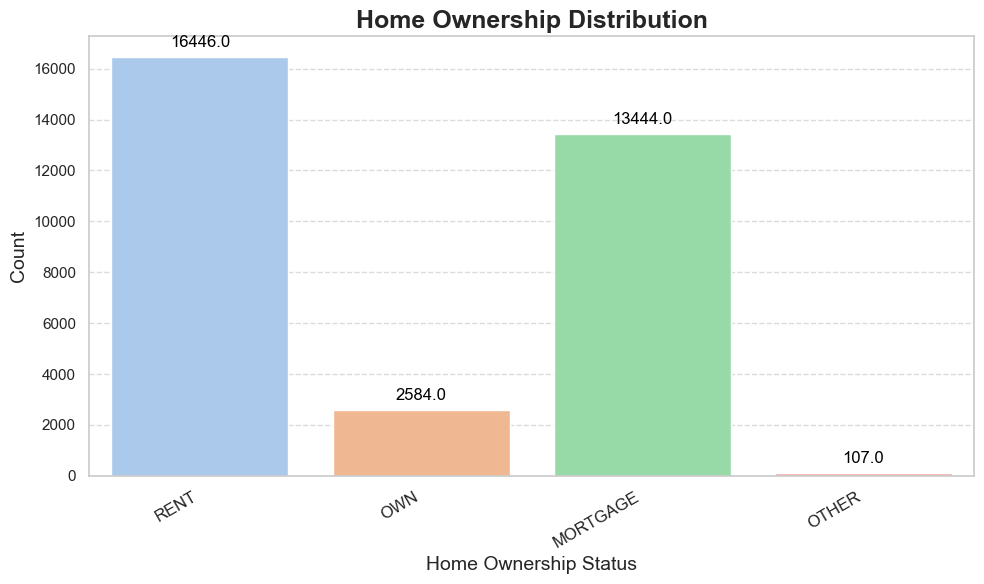

In [83]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the count plot
plt.figure(figsize=(10, 6))
count_plot = sns.countplot(x='person_home_ownership', data=cr, palette='pastel')

# Add title and labels with a larger font size
plt.title('Home Ownership Distribution', fontsize=18, fontweight='bold')
plt.xlabel('Home Ownership Status', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add data labels on top of the bars
for p in count_plot.patches:
    count_plot.annotate(f'{p.get_height()}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', 
                        fontsize=12, color='black', 
                        xytext=(0, 5), 
                        textcoords='offset points')

# Customize x-ticks for better readability
plt.xticks(rotation=30, ha='right', fontsize=12)

# Show gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

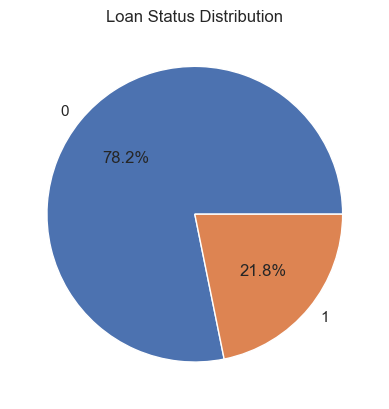

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style using Seaborn's API
sns.set_style('whitegrid')

# Create your pie chart or any other plot here
cr['loan_status'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Loan Status Distribution')
plt.ylabel('')
plt.show()

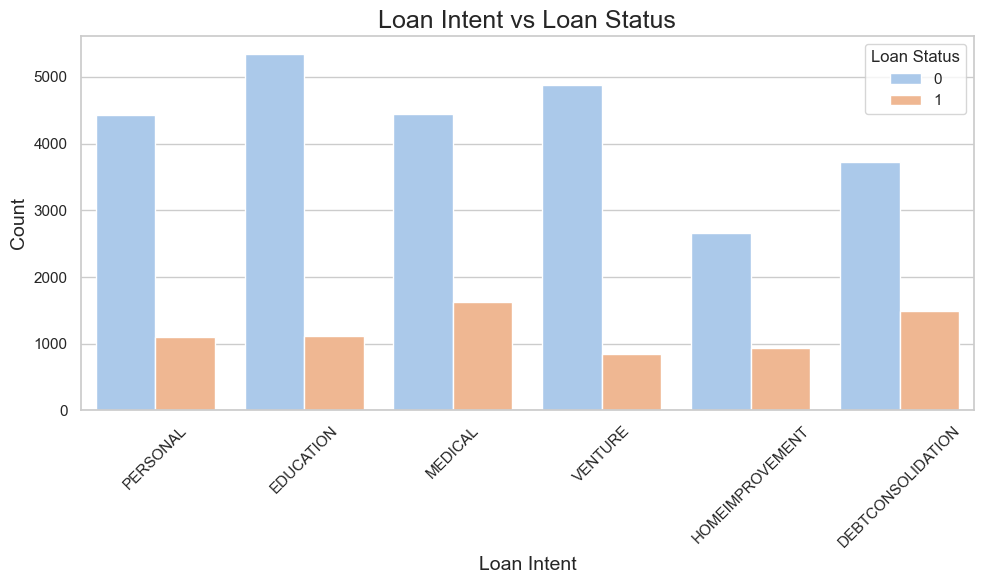

In [85]:
plt.figure(figsize=(10, 6))
sns.countplot(x='loan_intent', hue='loan_status', data=cr, palette='pastel')
plt.title('Loan Intent vs Loan Status', fontsize=18)
plt.xlabel('Loan Intent', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Loan Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

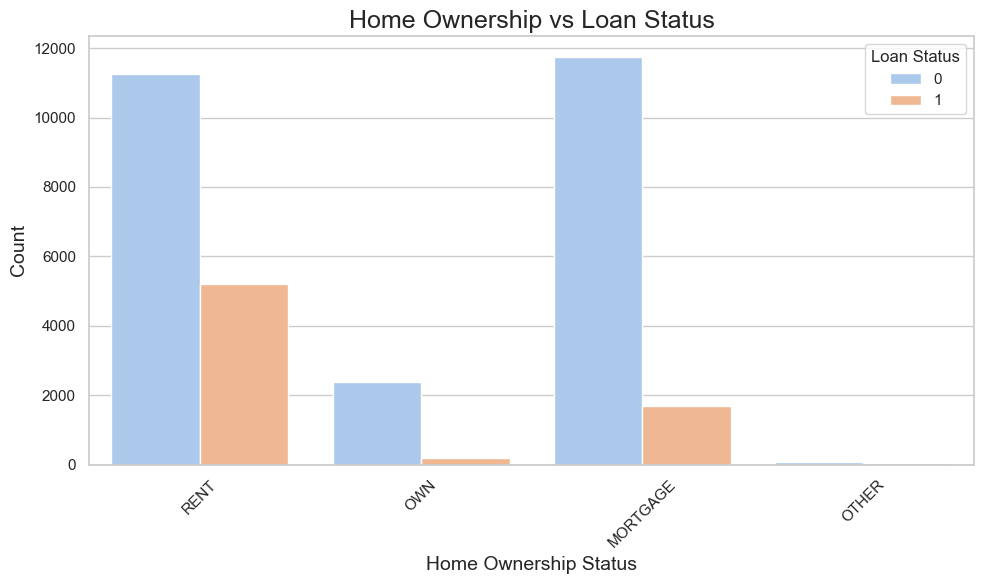

In [86]:
plt.figure(figsize=(10, 6))
sns.countplot(x='person_home_ownership', hue='loan_status', data=cr, palette='pastel')
plt.title('Home Ownership vs Loan Status', fontsize=18)
plt.xlabel('Home Ownership Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Loan Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\miracle\AppData\Local\Temp\ipykernel_5856\739882937.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_grade', y='loan_int_rate', data=cr, palette='pastel')


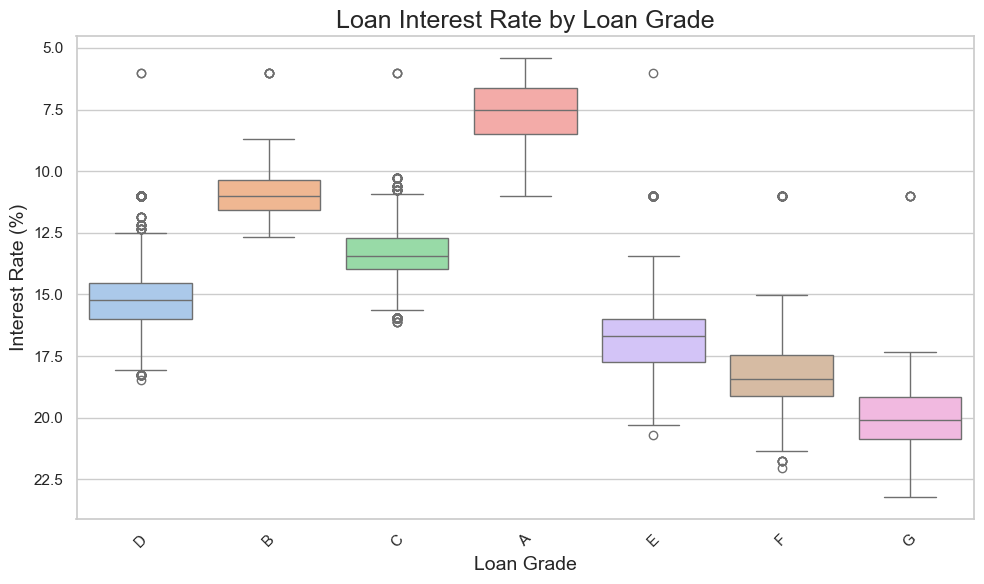

In [87]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_grade', y='loan_int_rate', data=cr, palette='pastel')
plt.title('Loan Interest Rate by Loan Grade', fontsize=18)
plt.xlabel('Loan Grade', fontsize=14)
plt.ylabel('Interest Rate (%)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\miracle\AppData\Local\Temp\ipykernel_5856\1441574999.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_intent', y='loan_amnt', data=cr, palette='pastel')


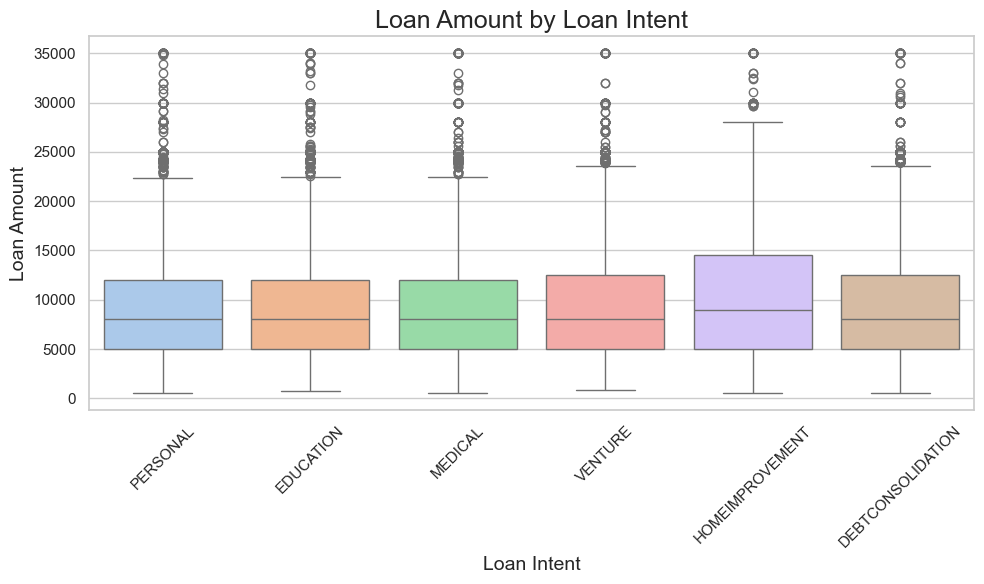

In [88]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_intent', y='loan_amnt', data=cr, palette='pastel')
plt.title('Loan Amount by Loan Intent', fontsize=18)
plt.xlabel('Loan Intent', fontsize=14)
plt.ylabel('Loan Amount', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\miracle\AppData\Local\Temp\ipykernel_5856\1976983473.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='cb_person_cred_hist_length', data=cr, palette='pastel')


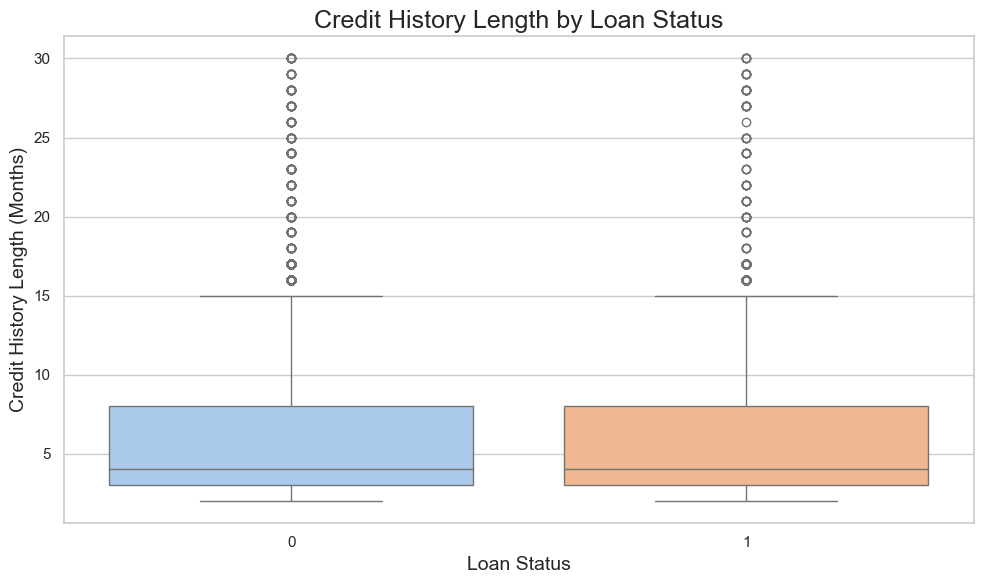

In [89]:
# Assuming 'cb_person_cred_hist_length' is in months and is a numerical column.
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='cb_person_cred_hist_length', data=cr, palette='pastel')
plt.title('Credit History Length by Loan Status', fontsize=18)
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Credit History Length (Months)', fontsize=14)
plt.tight_layout() 
plt.show()

In [90]:
cr.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

## Predicting credit risk using the CREDIT RISK DATASET

Training improved model with balanced classes...

Cross-validation scores: [0.82262022 0.83781131 0.84590848 0.82983683 0.84284137]
Average CV score: 0.8358036407749749

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.91      5095
           1       0.65      0.76      0.70      1422

    accuracy                           0.86      6517
   macro avg       0.79      0.82      0.80      6517
weighted avg       0.87      0.86      0.86      6517


Top 5 Most Important Features:
                 feature  importance
8    loan_percent_income    0.316080
7          loan_int_rate    0.314594
1          person_income    0.130864
4            loan_intent    0.090706
2  person_home_ownership    0.062881


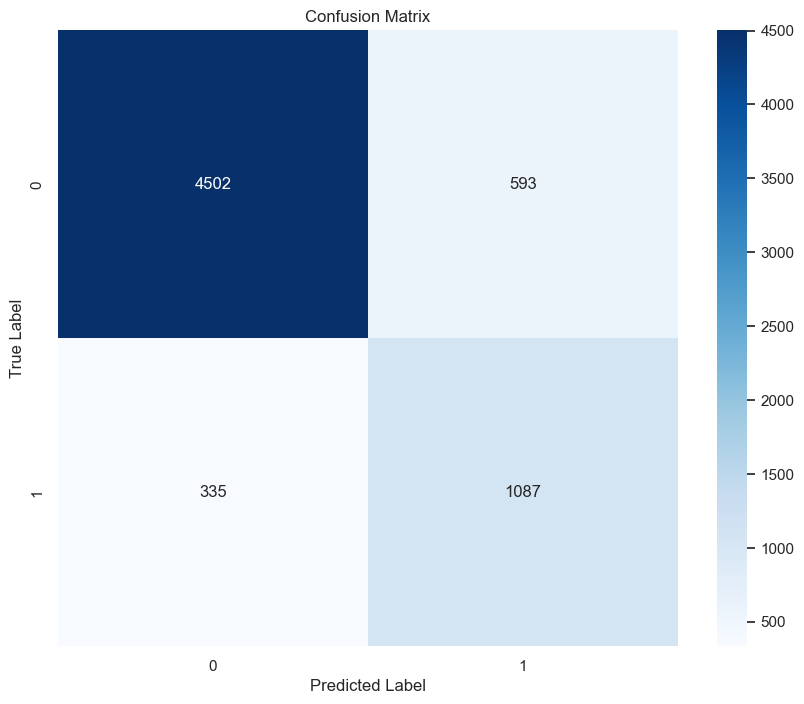

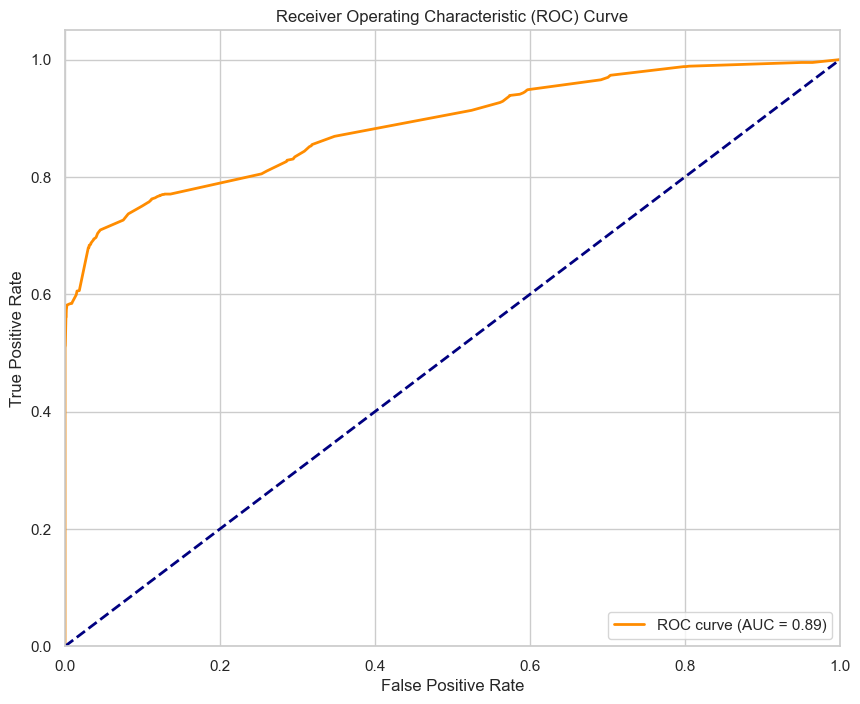

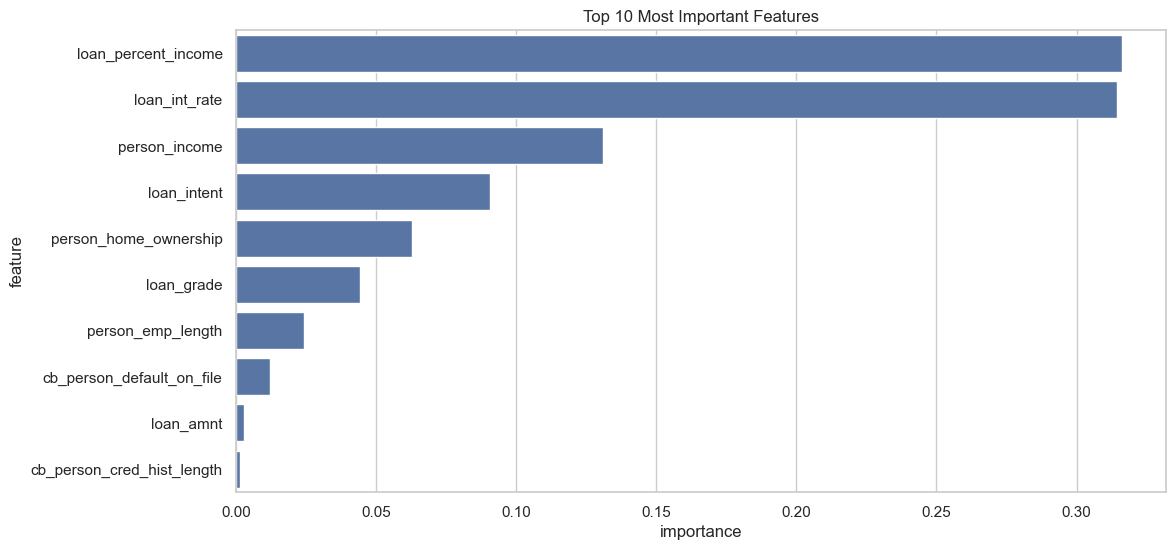

In [103]:
# Load and preprocess data
cr = pd.read_csv("credit_risk_dataset.csv")

def preprocess_and_balance_data():
    # Create a copy of the dataframe
    df = cr.copy()
    
    # Handle categorical variables
    le = LabelEncoder()
    categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 
                       'cb_person_default_on_file']
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])
    
    # Handle missing values
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numerical_cols:
        df[col] = df[col].fillna(df[col].median())
    
    # Prepare features and target
    X = df.drop('loan_status', axis=1)
    y = df['loan_status']
    
    # Split data first
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                        random_state=42, 
                                                        stratify=y)
    
    # Apply SMOTE only to training data
    smote = SMOTE(random_state=42)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
    
    return X_train_balanced, X_test, y_train_balanced, y_test

def train_and_evaluate_model():
    # Get preprocessed and balanced data
    X_train, X_test, y_train, y_test = preprocess_and_balance_data()
    
    # Train model with optimized parameters
    dt = DecisionTreeClassifier(
        max_depth=8,
        min_samples_split=50,
        min_samples_leaf=20,
        random_state=42
    )
    
    # Perform cross-validation
    cv_scores = cross_val_score(dt, X_train, y_train, cv=5)
    print("\nCross-validation scores:", cv_scores)
    print("Average CV score:", cv_scores.mean())
    
    # Train final model
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    
    # Get feature importance
    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': dt.feature_importances_
    }).sort_values('importance', ascending=False)
    
    # Calculate probabilities for ROC curve
    y_pred_proba = dt.predict_proba(X_test)[:, 1]
    
    return dt, y_test, y_pred, y_pred_proba, feature_importance

def plot_results(y_test, y_pred, y_pred_proba, feature_importance):
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    
    # Plot feature importance
    plt.figure(figsize=(12, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
    plt.title('Top 10 Most Important Features')
    plt.show()

def main():
    print("Training improved model with balanced classes...")
    model, y_test, y_pred, y_pred_proba, feature_importance = train_and_evaluate_model()
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    print("\nTop 5 Most Important Features:")
    print(feature_importance.head())
    
    plot_results(y_test, y_pred, y_pred_proba, feature_importance)
    
    return model, feature_importance

if __name__ == "__main__":
    model, feature_importance = main()